In [2]:
import os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.io.wavfile import read
from scipy.io.wavfile import write
sampling_rate, data = read('with_hum.wav')
from IPython.display import Audio

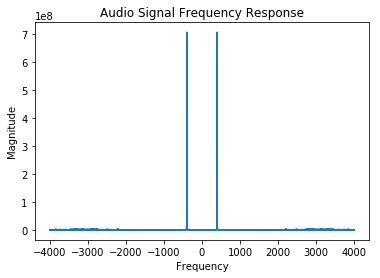

In [4]:
data_ = np.fft.fft(data)
data_freq = np.fft.fftfreq(data.size,1/sampling_rate)
plt.plot(data_freq,abs(data_))
plt.title('Audio Signal Frequency Response')
plt.ylabel('Magnitude')
plt.xlabel('Frequency')
plt.show()

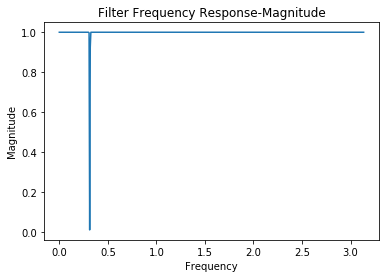

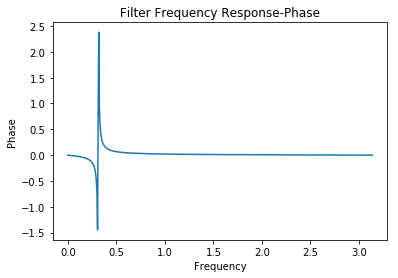

In [5]:
nyq = sampling_rate*0.5
lowcut = 395
highcut = 405
low = lowcut/nyq
high = highcut/nyq

b, a = signal.butter(4, [low,high], btype = 'bandstop', analog=False)
w, h = signal.freqz(b,a)
plt.plot(w,abs(h))
plt.title('Filter Frequency Response-Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.plot(w,np.angle(h))
plt.title('Filter Frequency Response-Phase')
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.show()

In [6]:
#Short Answer Question
"""This bandpass filter filters out signal with frequency in between 390 and 410. Typically, 
the number of taps is equal to the filter length.It means the amount of filtering a filter 
can do. More taps means more stopband attenuation and narrower filters. Using less taps will
not achieve the same effect of filtering. The practical effect of using less steps is that the 
computational cost will be smaller, since it's an indication of memory and calculations required.
"""

"This bandpass filter filters out signal with frequency in between 390 and 410. Typically, \nthe number of taps is equal to the filter length.It means the amount of filtering a filter \ncan do. More taps means more stopband attenuation and narrower filters. Using less taps will\nnot achieve the same effect of filtering. The practical effect of using less steps is that the \ncomputational cost will be smaller, since it's an indication of memory and calculations required.\n"

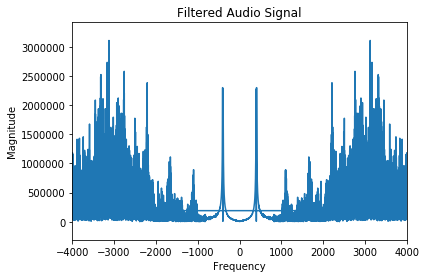

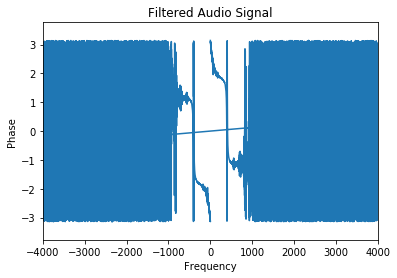

In [9]:
filtered = signal.lfilter(b, a, data)
filtered_ = np.fft.fft(filtered)
filtered_freq = np.fft.fftfreq(filtered.size,1/sampling_rate)
plt.plot(filtered_freq,abs(filtered_))
plt.title('Filtered Audio Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.margins(0, 0.1)
plt.show()

plt.plot(filtered_freq,np.angle(filtered_))
plt.title('Filtered Audio Signal')
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.margins(0, 0.1)
plt.show()

In [118]:
write('hum_new.wav',sampling_rate,np.asarray(output,dtype=np.int16))
Audio('hum_new.wav')